In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Mounted at /content/gdrive


Code above and to import data came from here
https://colab.research.google.com/notebooks/io.ipynb#scrollTo=J4QxBareshEV


In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.api import VAR
from scipy.stats import chi2
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.vector_ar.svar_model import SVAR

In [2]:
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.0 MB/s eta 0:00:00


In [5]:
#import data

worksheet = gc.open('VIX_&_Inflation_sheets').sheet1
rows = worksheet.get_all_values()
print(rows)
Data = pd.DataFrame.from_records(rows)

Data.columns = Data.iloc[0]
Data = Data.drop(Data.index[0])

Data['Date'] = pd.to_datetime(Data['Date'], format='%Y-%m-%d')
Data = Data.set_index('Date')

#Changes values to numeric and calculates monthly inflation from CPI
Data['VIX_Open'] = pd.to_numeric(Data['VIX_Open'], errors='coerce')
Data['CPI'] = pd.to_numeric(Data['CPI'], errors='coerce')
Data['Monthly_Inflation(%)'] = Data['CPI'].pct_change()*100
Data['Federal Funds Effective Rate %'] = pd.to_numeric(Data['Federal Funds Effective Rate %'], errors='coerce')
Data['rGDP (in Billions)'] = pd.to_numeric(Data['rGDP (in Billions)'], errors='coerce')
Data['Unemployment rate %'] = pd.to_numeric(Data['Unemployment rate %'], errors='coerce')


Data.head()

[['Year', 'Month', 'Federal Funds Effective Rate %', 'USD Overnight LIBOR Rate % / SOFR Rate %', 'Nasdaq closed price', 'Nasdaq closed price change %', 'Unemployment rate %', 'Personal consumption expenditures (in billions)', 'rGDP (in Billions)', 'Population(in thousands)', 'Government Consumption & Gross Investment (in Millions)', 'Real Disposable Personal Income', 'Consumer Loan (credit card and revolving plan)', 'Consumer Credit Outstanding', 'BCI (business confidence index)', 'CCI (consumption confidence index)', 'FDI (foreign direct investment, in millions)', 'PPI(Index 1982=100)', 'Total Industry Excluding Construction(Index Jan 1960=100)', 'CPI for Canada', 'CPI for mex', 'CPI for CHN', 'CPI for OECD', 'CPI for EU', 'Fx CAN/USD', 'Fx Yuan/USD', 'Fx Peso/USD', 'Fx Yen/USD', 'Fx EUR/USD', 'Changes in debt as percent of GDP %', 'Total Public Debt Outstanding', 'Private Sector Investment (Real Gross Private Domestic Investment)', 'Date', 'CPI', 'Date2', 'VIX_Price', 'CVol', 'VIX_Ch

,Year,Month,Federal Funds Effective Rate %,USD Overnight LIBOR Rate % / SOFR Rate %,Nasdaq closed price,Nasdaq closed price change %,Unemployment rate %,Personal consumption expenditures (in billions),rGDP (in Billions),Population(in thousands),...,VIX_Price,CVol,VIX_Change,VIX_%Change,"VIX_Total_Return_(Gross,Unhedged)","VIX_Cumulative_Return_%_(Gross,Unhedged)",VIX_Open,VIX_High,VIX_Low,Monthly_Inflation(%)
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,0.110000,0.172129,2147.35,-5.367648679,9.8,"10,056.10",5527.570,308706,...,21.68,,-2.83,-11.55,,,24.51,24.51,19.25,NaN
2010-02-01,2010,2,0.126429,0.172487,2238.26,4.233590239,9.8,"10,093.40",5527.570,308904,...,24.62,,2.94,13.56,,,21.68,28.01,16.86,-0.095178
2010-03-01,2010,3,0.164516,0.202982,2397.96,7.135006657,9.9,"10,156.00",5527.570,309095,...,19.50,,-5.12,-20.80,,,24.33,29.22,19.32,0.033137
2010-04-01,2010,4,0.198333,0.241832,2461.19,2.636824634,9.9,"10,182.30",5581.054,309289,...,17.59,,-1.91,-9.79,,,19.93,19.94,16.17,0.023004
2010-05-01,2010,5,0.200645,0.295772,2257.04,-8.294767978,9.6,"10,210.80",5581.054,309485,...,22.05,,4.46,25.36,,,17.01,23.20,15.23,-0.051977


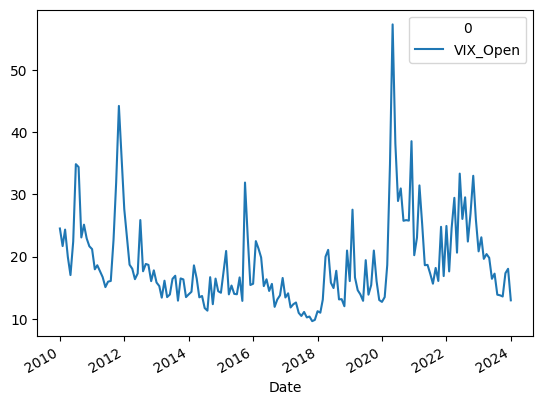

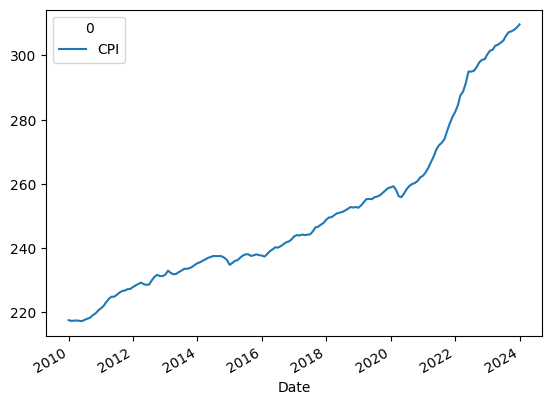

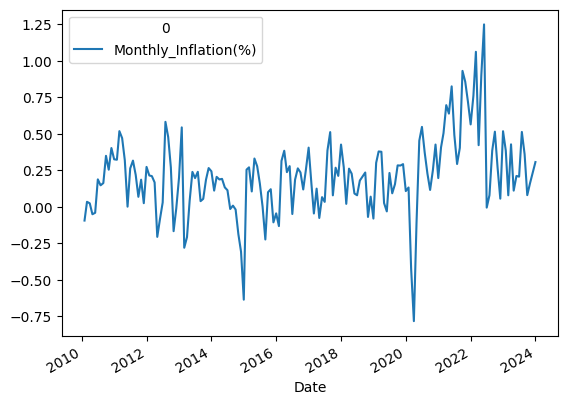

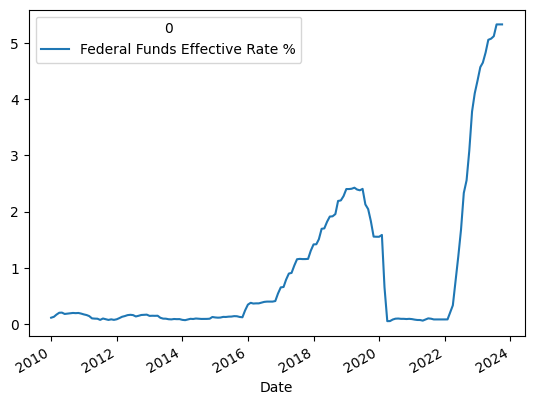

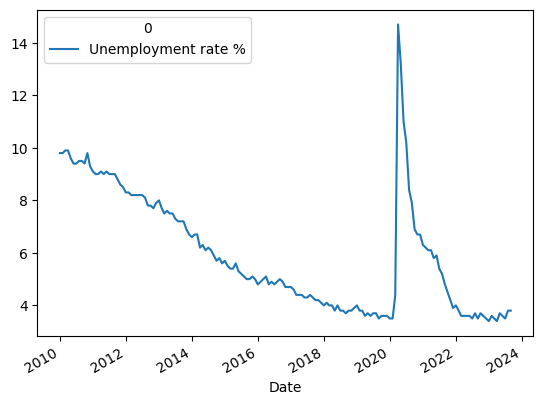

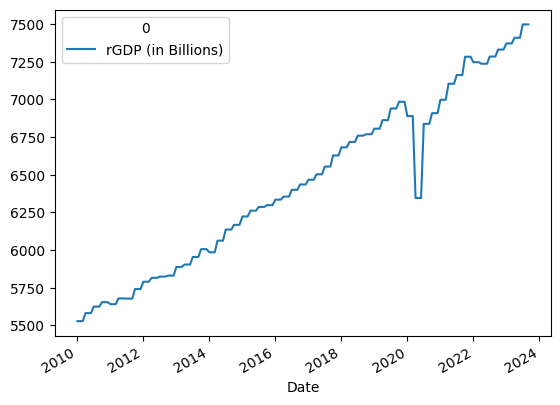

In [6]:
#Plots
Data[['VIX_Open']].plot()
pyplot.show()
Data[['CPI']].plot()
pyplot.show()
Data[['Monthly_Inflation(%)']].plot()
pyplot.show()
Data[['Federal Funds Effective Rate %']].plot()
pyplot.show()
Data[['Unemployment rate %']].plot()
pyplot.show()
Data[['rGDP (in Billions)']].plot()
pyplot.show()

In [7]:
#Stationarity Test VIX (ADF)
adf1 = ADF(Data['VIX_Open'])
print(adf1.summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                 -5.584
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [8]:
#Stationarity Tests Inflation (ADF) + First diff
filtered_data = Data[Data['Monthly_Inflation(%)'].notna()]
adf2 = ADF(filtered_data['Monthly_Inflation(%)'])
print(adf2.summary().as_text())

Data['inflation_first_diff'] = Data[['Monthly_Inflation(%)']].diff()
filtered_data = Data[Data['inflation_first_diff'].notna()]
adf3 = ADF(filtered_data['inflation_first_diff'])
print(adf3.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.095
P-value                         0.246
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -6.948
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
#Stationarity Tests Fed Funds(ADF) + First diff
#ADF Test for level Did not converge but obviously not stationary


Data['fed_funds_firstdiff'] = Data[['Federal Funds Effective Rate %']].diff()
filtered_data = Data[Data['fed_funds_firstdiff'].notna()]
adf4 = ADF(filtered_data['fed_funds_firstdiff'])
print(adf4.summary().as_text())
#First Diff stationary at 10%




   Augmented Dickey-Fuller Results   
Test Statistic                 -2.674
P-value                         0.079
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [10]:
#Stationarity Tests Unemployment(ADF) + First diff


filtered_data = Data[Data['Unemployment rate %'].notna()]
adf5 = ADF(filtered_data['Unemployment rate %'])
print(adf5.summary().as_text())

#Level stationary at 10% ????

Data['unemployment_first_diff'] = Data[['Unemployment rate %']].diff()
filtered_data = Data[Data['unemployment_first_diff'].notna()]
adf6 = ADF(filtered_data['unemployment_first_diff'])
print(adf6.summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.704
P-value                         0.073
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -10.088
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [11]:
#Stationarity Tests real GDP (ADF) + First diff


filtered_data = Data[Data['rGDP (in Billions)'].notna()]
adf5 = ADF(filtered_data['rGDP (in Billions)'])
print(adf5.summary().as_text())

#Level stationary at 10% ????

Data['realgdp_first_diff'] = Data[['rGDP (in Billions)']].diff()
filtered_data = Data[Data['realgdp_first_diff'].notna()]
adf6 = ADF(filtered_data['realgdp_first_diff'])
print(adf6.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.434
P-value                         0.904
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -9.092
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [28]:
#Pick Lag length
###CHECK THIS AGAIN####

clean_data = Data[['VIX_Open','inflation_first_diff','unemployment_first_diff','fed_funds_firstdiff','realgdp_first_diff','Unemployment rate %']]
clean_data = clean_data.dropna(subset=["VIX_Open"])
clean_data = clean_data.dropna(subset=["inflation_first_diff"])
clean_data = clean_data.dropna(subset=["Unemployment rate %"])
clean_data = clean_data.dropna(subset=["fed_funds_firstdiff"])
clean_data = clean_data.dropna(subset=["realgdp_first_diff"])
endog = clean_data[['inflation_first_diff','VIX_Open' ]]
exog = clean_data[['fed_funds_firstdiff','unemployment_first_diff','realgdp_first_diff']]


def fit_var_model(end,ex, maxlags):
    """
    Fit a VAR model for each lag length up to maxlags and calculate AIC and the LR test statistic.
    """
    results = []
    for lags in range(1, maxlags + 1):
        model = VAR(end,ex)
        result = model.fit(lags)
        results.append(result)

    return results

def likelihood_ratio_test(results):
    """
    Perform the Likelihood Ratio test and determine the optimal number of lags.
    """
    lr_tests = []
    for i in range(1, len(results)):
        lr_stat = -2 * (results[i-1].llf - results[i].llf)
        lr_dof = results[i].k_ar - results[i-1].k_ar
        lr_pvalue = chi2.sf(lr_stat, df=lr_dof)
        lr_tests.append((lr_stat, lr_pvalue, i+1))  # i+1 represents the number of lags

    return lr_tests

def find_optimal_lags(end,ex, maxlags):
    """
    Find the optimal number of lags for a VAR model based on the LR test.
    """
    results = fit_var_model(end,ex, maxlags)
    lr_tests = likelihood_ratio_test(results)

    # Find the lag with the lowest p-value that is still significant (e.g., < 0.05)
    optimal_lags = None
    for stat, pvalue, lags in sorted(lr_tests, key=lambda x: x[1]):
        if pvalue < 0.05:
            optimal_lags = lags
            break

    return optimal_lags, lr_tests

optimal_lags, lr_tests = find_optimal_lags(endog,exog, maxlags=6)
print("Optimal number of lags:", optimal_lags)
for test in lr_tests:
  print(f"Lags: {test[2]}, LR Statistic: {test[0]:.2f}, p-value: {test[1]:.4f}")

Optimal number of lags: 2
Lags: 2, LR Statistic: 37.88, p-value: 0.0000
Lags: 3, LR Statistic: 26.68, p-value: 0.0000
Lags: 4, LR Statistic: 16.35, p-value: 0.0001
Lags: 5, LR Statistic: 17.08, p-value: 0.0000
Lags: 6, LR Statistic: 9.54, p-value: 0.0020


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [13]:
#VAR Model 1
model1 = VAR(endog, exog)
model1_fit = model1.fit(2)
model1_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2024
Time:                     04:03:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.719636
Nobs:                     161.000    HQIC:                  0.537750
Log likelihood:          -474.178    FPE:                    1.51221
AIC:                     0.413410    Det(Omega_mle):         1.37243
--------------------------------------------------------------------
Results for equation inflation_first_diff
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          -0.107854         0.058094           -1.857           0.063
fed_funds_firstdiff            -0.022590         0.129329           -0.175           0.861
unemp

In [14]:
#Stability Test
if model1_fit.is_stable():
    print("The model is stable.")
else:
    print("The model is not stable.")


The model is stable.


In [15]:
#Granger Causality Test
causality_results = model1_fit.test_causality(caused='VIX_Open', causing=['inflation_first_diff'], kind='f', signif=0.05)
print(causality_results.summary())
causality_results = model1_fit.test_causality(caused='inflation_first_diff', causing=['VIX_Open'], kind='f', signif=0.05)
print(causality_results.summary())

Granger causality F-test. H_0: inflation_first_diff does not Granger-cause VIX_Open. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         4.820          3.025   0.009 (2, 306)
----------------------------------------------
Granger causality F-test. H_0: VIX_Open does not Granger-cause inflation_first_diff. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         2.119          3.025   0.122 (2, 306)
----------------------------------------------


In [16]:
#Whiteness of Residuals
whiteness_results=model1_fit.test_whiteness()
print(whiteness_results)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 56.865, critical value: 46.194>, p-value: 0.004>


In [17]:
#Normality
normality_results=model1_fit.test_normality()
print(normality_results)

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 251.217, critical value: 9.488>, p-value: 0.000>


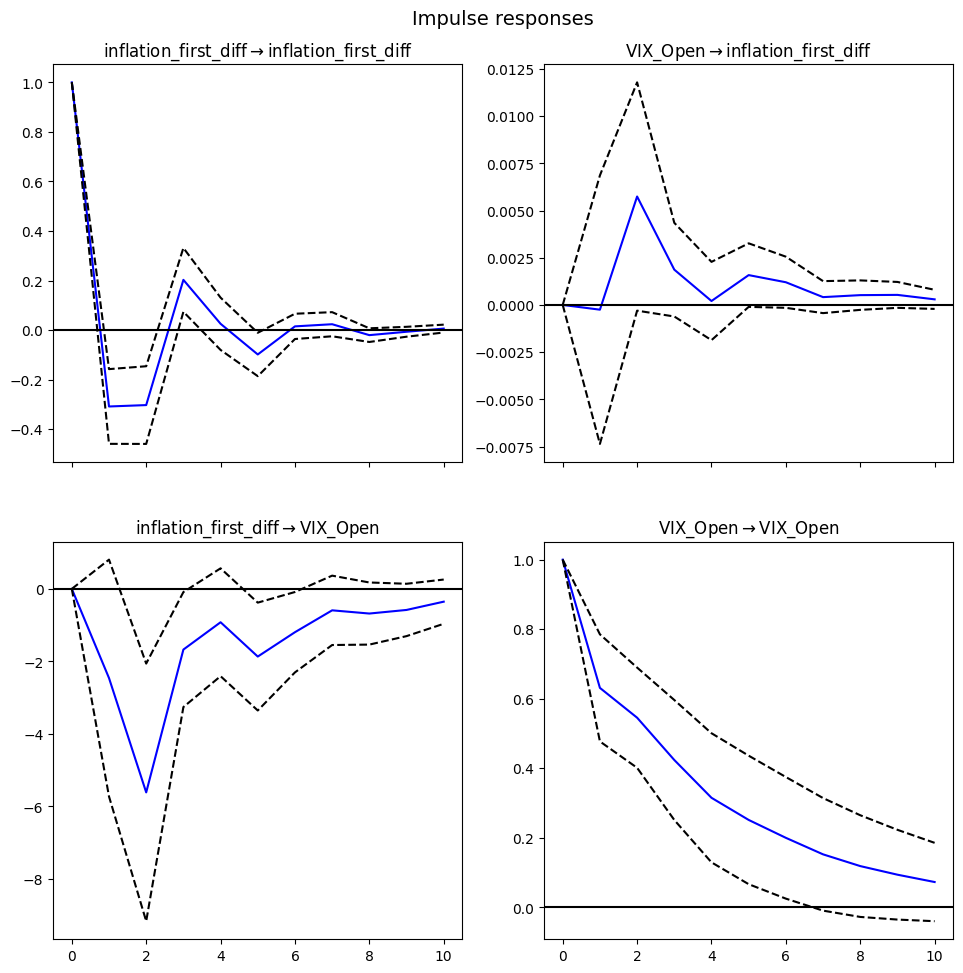

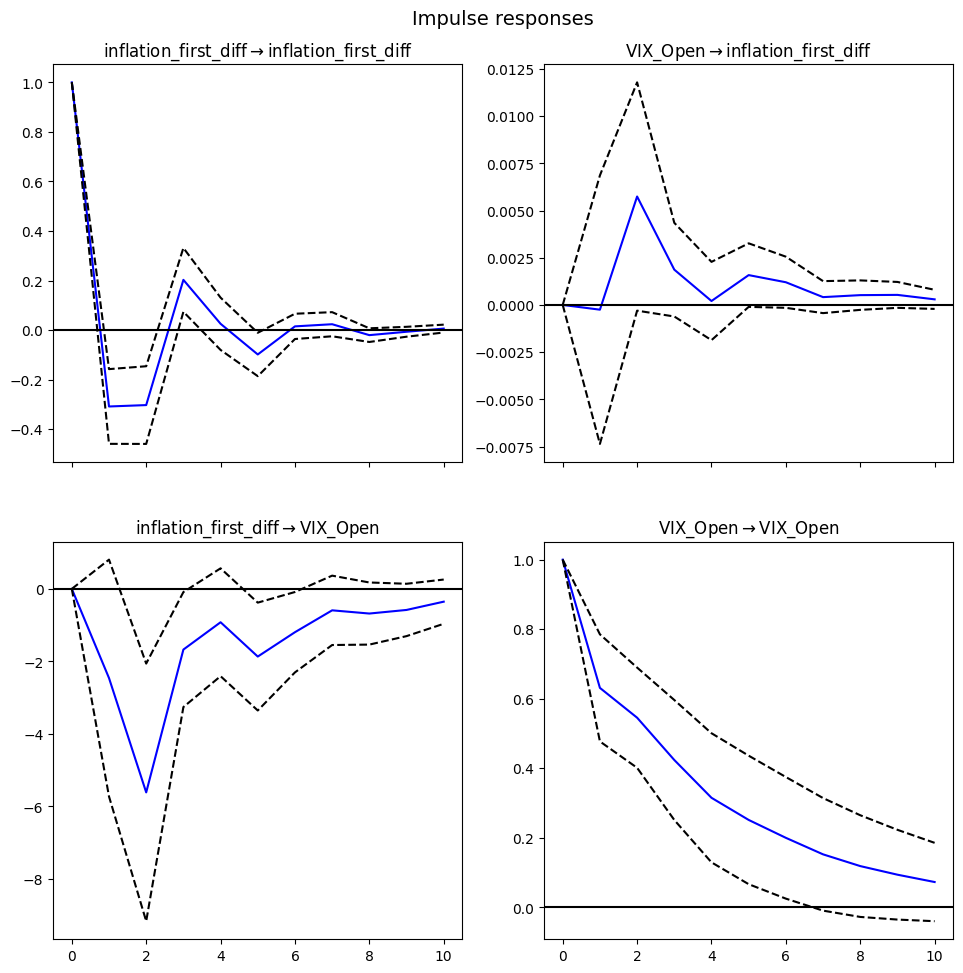

In [18]:
#Impulse response functions (Reduced Form)
irf = model1_fit.irf(10)  # Get IRF for 10 periods
irf.plot()

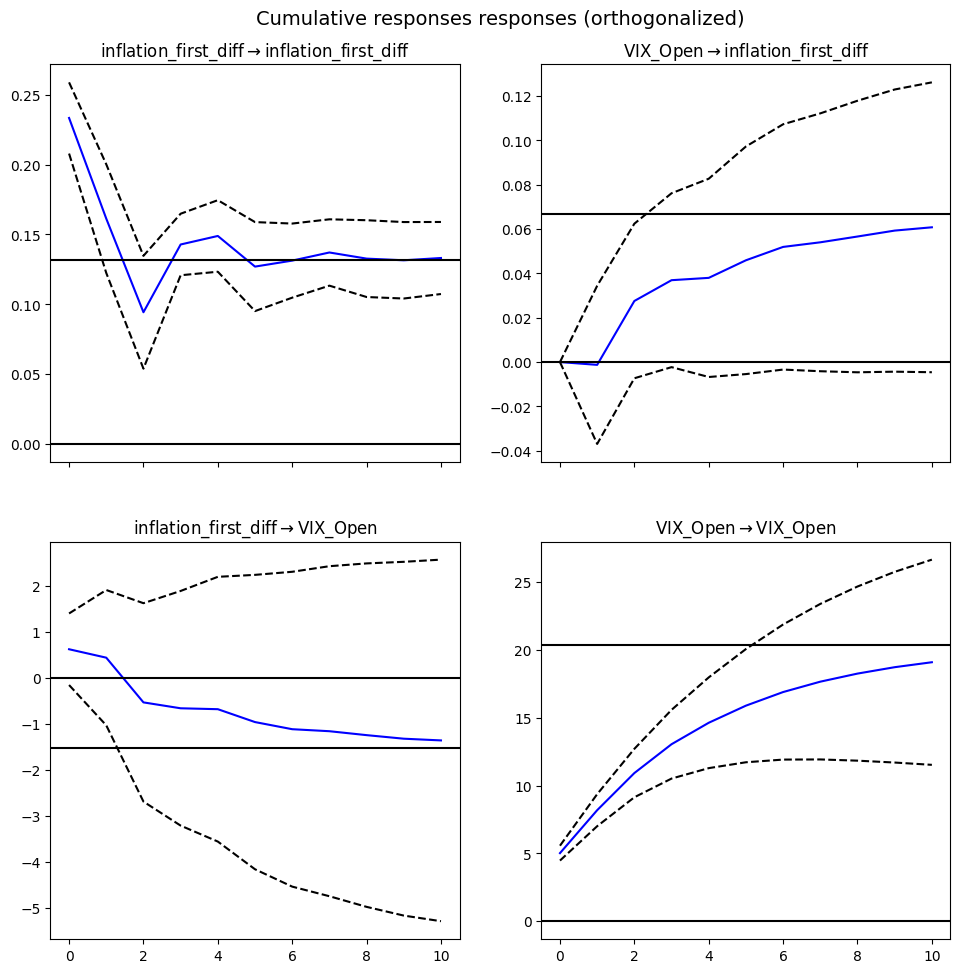

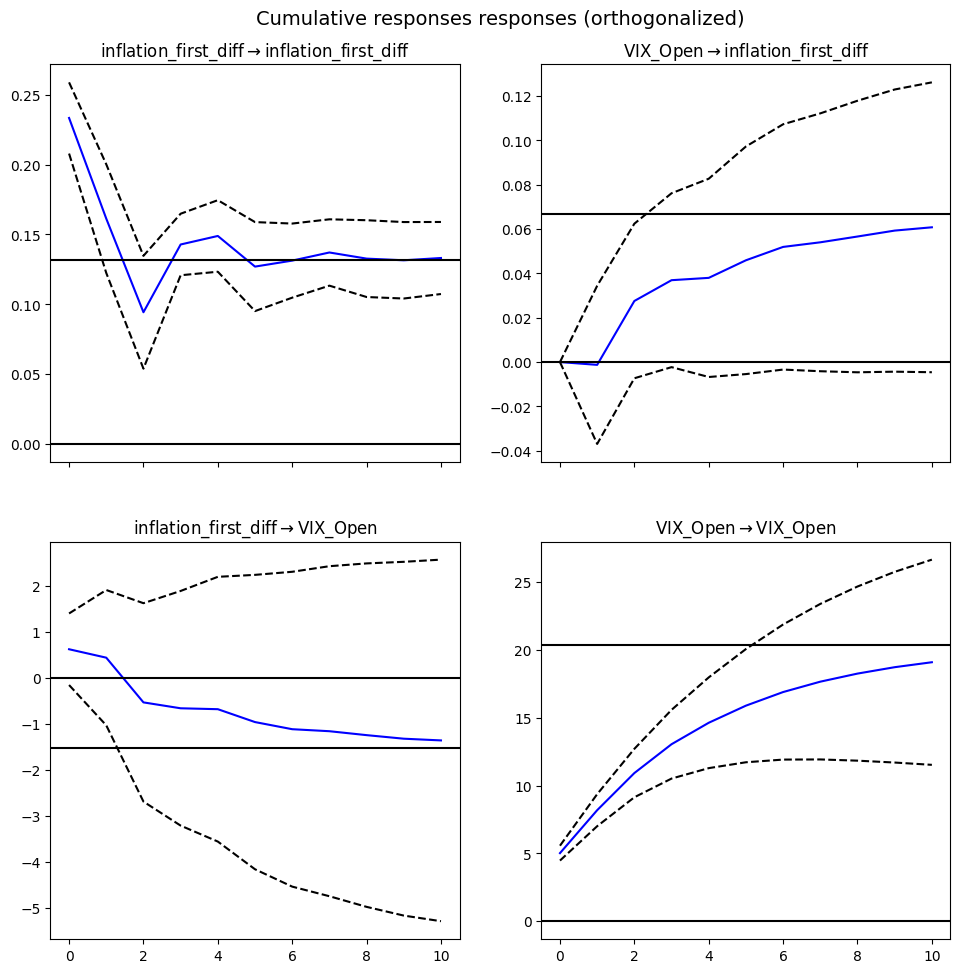

In [ ]:
#Cummulative Effects
irf_struc.plot_cum_effects(orth=True)

In [62]:
#Transformation to Structural Form
##Figure out order of variables#####
##Cholesky decomposition  (Inflation has instant effect on VIX but converse is false)

residual_covariance = model1_fit.sigma_u

#print(residual_covariance)

L = np.linalg.cholesky(residual_covariance)

print(L)

#variance_covariance_matrix = model1_fit.cov_params()
#print(variance_covariance_matrix)
#print(coefficients_matrix)

residuals = model1_fit.resid
#print(residuals)

L_inv = np.linalg.inv(L)
structural_shocks = np.dot(L_inv, residuals.T)
#print(structural_shocks)




[[0.23344718 0.        ]
 [0.61953269 5.01830378]]


In [51]:
A = model1_fit.params
print(A)

                         inflation_first_diff  VIX_Open
const                               -0.107854  4.347652
fed_funds_firstdiff                 -0.022590  1.163618
unemployment_first_diff             -0.043180  0.638823
realgdp_first_diff                   0.000328 -0.012391
L1.inflation_first_diff             -0.308141 -2.460182
L1.VIX_Open                         -0.000250  0.631154
L2.inflation_first_diff             -0.398054 -4.818442
L2.VIX_Open                          0.005824  0.146481


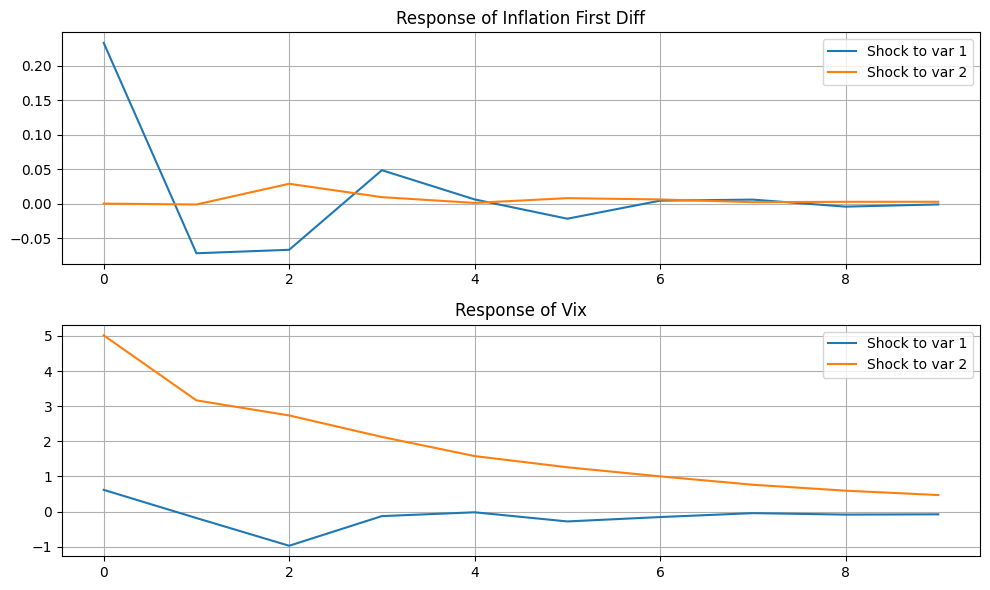

In [60]:
#CHANGE COEFFICIENTS IF NEED BE
# Assuming you have the VAR(2) model coefficients for each lag
# A1 and A2 are the coefficient matrices for lag 1 and lag 2, respectively
A1 = np.array([[-0.308141,-0.000250], [-2.460182, 0.631154]])
A2 = np.array([[-0.398054, 0.005824], [-4.818442,0.146481]])

# Number of periods to simulate
horizon = 10

# Initialize an array to store the impulse responses
IRFs = np.zeros((2, 2, horizon))

# Simulate the impulse response for a one-unit shock to each variable
for i in range(2):  # Loop over variables
    shock = np.zeros(2)
    shock[i] = 1  # One-unit shock to the i-th variable

    # Propagate the shock over the horizon
    response_history = np.zeros((2, horizon))  # To keep track of the last two responses
    for t in range(horizon):
        if t == 0:
            response = np.dot(L, shock)
        elif t == 1:
            # For t=1, we only have the immediate past (t=0) response
            response = np.dot(A1, response_history[:, t-1])
        else:
            # For t>=2, we consider responses from both t-1 and t-2
            response = np.dot(A1, response_history[:, t-1]) + np.dot(A2, response_history[:, t-2])

        # Store the response in history for use in future timesteps
        response_history[:, t] = response
        IRFs[:, i, t] = response

# Plot the impulse response functions
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
for i in range(2):
    axes[0].plot(IRFs[0, i, :], label=f'Shock to var {i+1}')
    axes[1].plot(IRFs[1, i, :], label=f'Shock to var {i+1}')
axes[0].set_title('Response of Inflation First Diff')
axes[1].set_title('Response of Vix')
for ax in axes:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
